In [133]:
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv('train.csv')

In [135]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [136]:
#Data Cleaning

In [137]:
df.shape

(5574, 2)

In [138]:
df.isnull().sum()

sms      0
label    0
dtype: int64

In [139]:
df.rename(columns={'sms':'text','label':'target'},inplace=True)

In [140]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [141]:
df.duplicated().sum()

403

In [142]:
#Remove duplicate

In [143]:
df = df.drop_duplicates(keep='first')

In [144]:
df.duplicated().sum()

0

In [145]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [146]:
df.shape

(5171, 2)

In [147]:
#Data Analisys

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

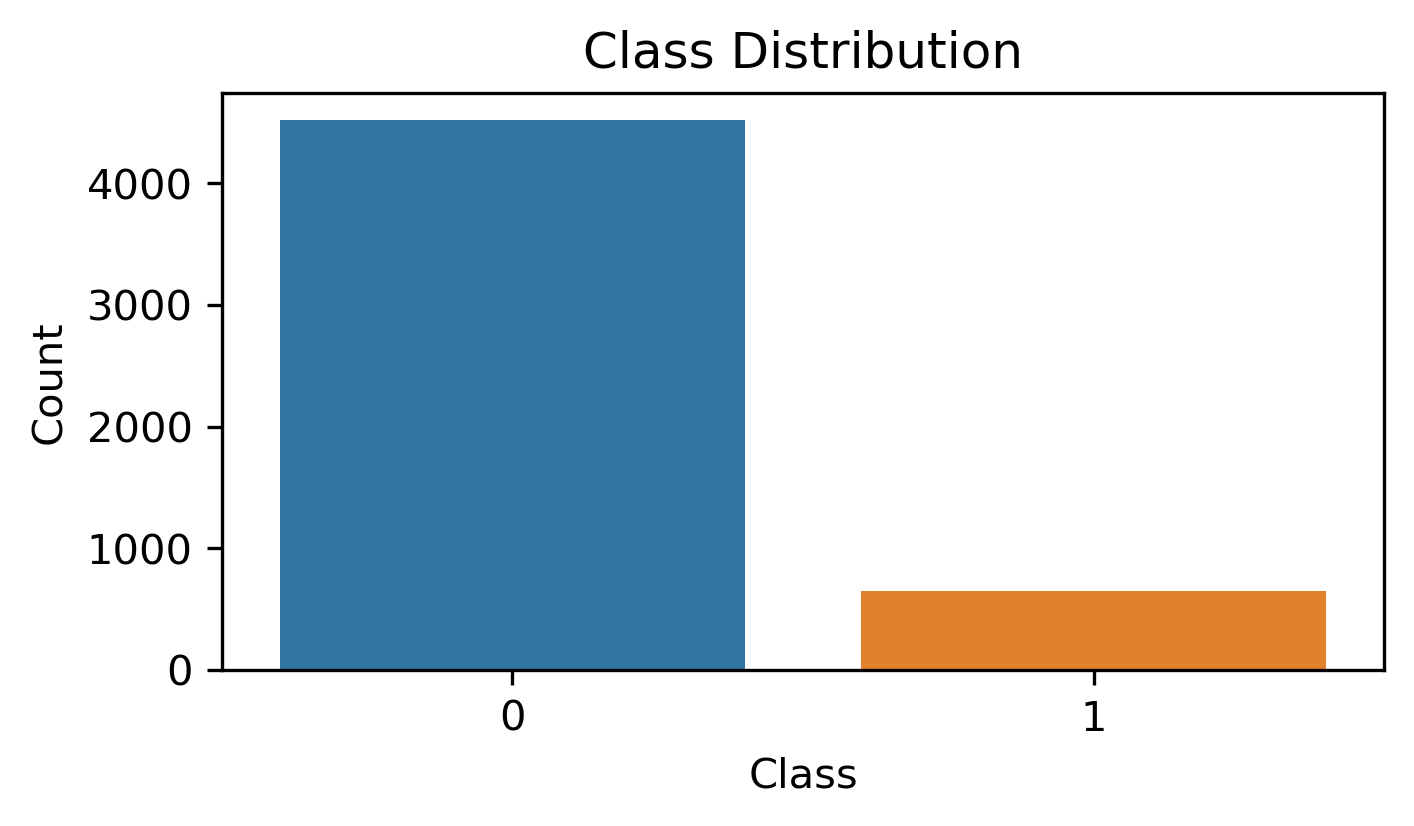

In [149]:
plt.figure(figsize=(5, 2.5), dpi=300)
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [150]:
import nltk
from nltk import word_tokenize

In [151]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [152]:
df['count_text_character'] = df['text'].apply(len)

In [153]:
df.head()

,text,target,count_text_character
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [154]:
df['count_text_number'] = df['text'].apply(lambda x:len(x.split(' ')))

In [155]:
df.head()

,text,target,count_text_character,count_text_number
0,"Go until jurong point, crazy.. Available only ...",0,112,20
1,Ok lar... Joking wif u oni...\n,0,30,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28
3,U dun say so early hor... U c already then say...,0,50,11
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13


In [156]:
df.iloc[0].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [157]:
df.iloc[1].text

'Ok lar... Joking wif u oni...\n'

In [158]:
df['count_text_sentence'] = df['text'].apply(lambda x:len(x.split(',')))

In [159]:
df.head()

,text,target,count_text_character,count_text_number,count_text_sentence
0,"Go until jurong point, crazy.. Available only ...",0,112,20,2
1,Ok lar... Joking wif u oni...\n,0,30,6,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28,1
3,U dun say so early hor... U c already then say...,0,50,11,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13,2


In [160]:
df[['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,5171.000000,5171.000000,5171.000000
mean,80.332431,15.549217,1.334751
std,58.333188,11.196886,0.782243
min,3.000000,1.000000,1.000000
25%,37.000000,7.000000,1.000000
50%,62.000000,12.000000,1.000000
75%,120.000000,22.000000,1.000000
max,911.000000,171.000000,14.000000


In [161]:
df[df['target'] == 0][['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,4518.000000,4518.000000,4518.000000
mean,71.894865,14.358566,1.308986
std,56.590179,11.276420,0.750567
min,3.000000,1.000000,1.000000
25%,35.000000,7.000000,1.000000
50%,54.000000,11.000000,1.000000
75%,92.000000,19.000000,1.000000
max,911.000000,171.000000,14.000000


In [162]:
df[df['target'] == 1][['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,653.000000,653.000000,653.000000
mean,138.710567,23.787136,1.513017
std,29.818940,5.948838,0.955401
min,14.000000,2.000000,1.000000
25%,133.000000,22.000000,1.000000
50%,149.000000,25.000000,1.000000
75%,158.000000,28.000000,2.000000
max,224.000000,35.000000,7.000000


In [163]:
import seaborn as sns

<Axes: xlabel='count_text_character', ylabel='Count'>

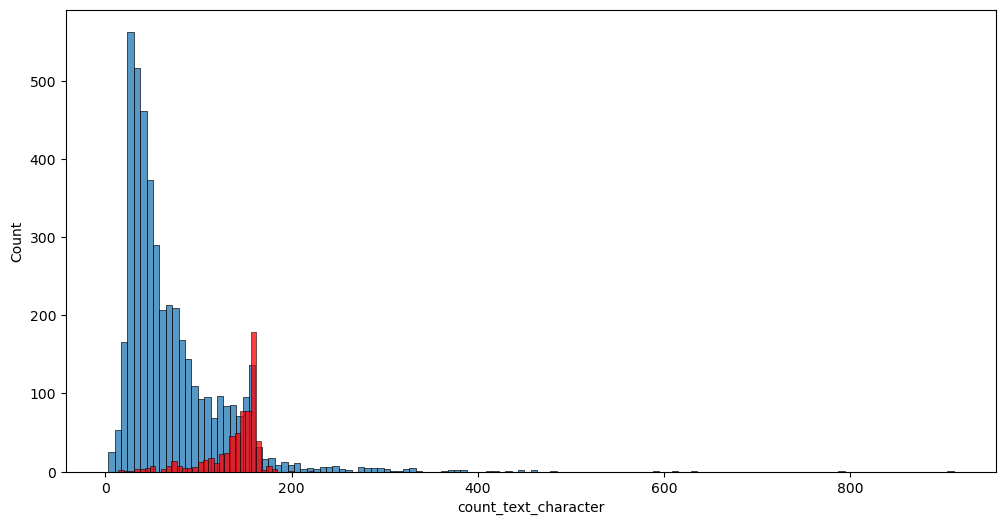

In [164]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['count_text_character'])
sns.histplot(df[df['target'] == 1]['count_text_character'],color='red')

<Axes: xlabel='count_text_number', ylabel='Count'>

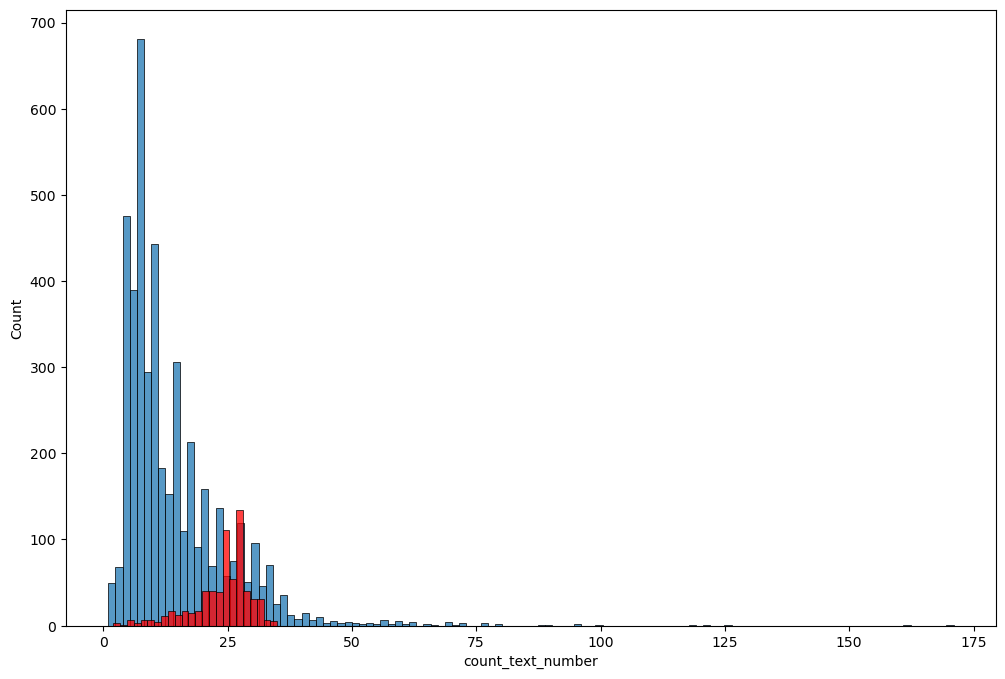

In [165]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['count_text_number'])
sns.histplot(df[df['target'] == 1]['count_text_number'],color='red')

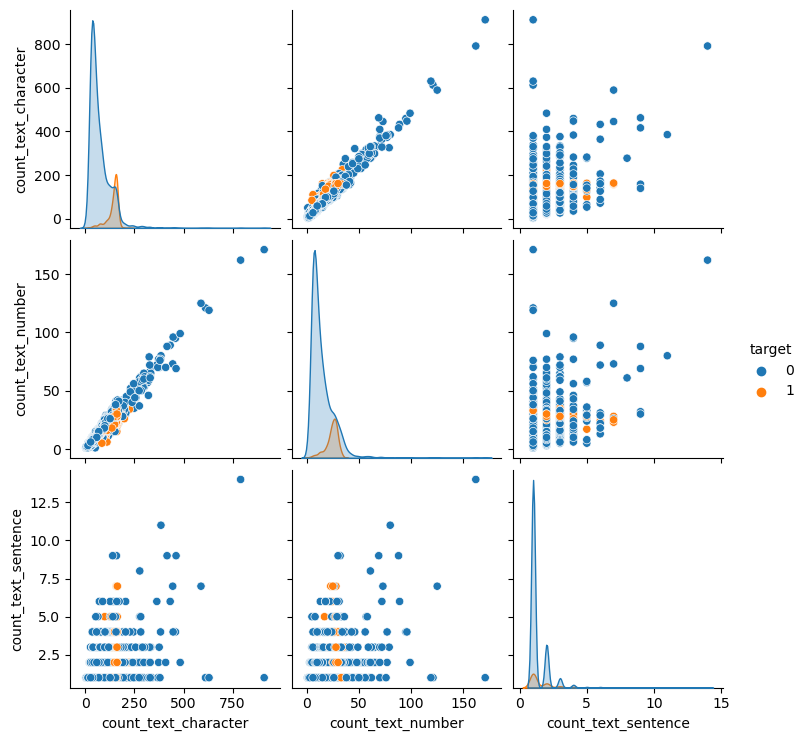

In [166]:
sns.pairplot(df,hue='target')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20900\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

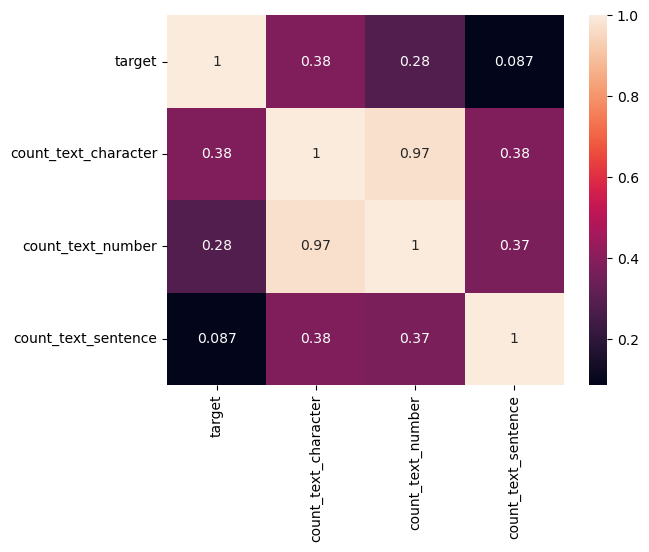

In [167]:
sns.heatmap(df.corr(),annot=True)

In [168]:
#Data Preprocessing

In [188]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [211]:
import re
def tranceform_text(text):
    text = text.lower()
    text = re.split(r'[^\w]+',text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in STOPWORDS and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [212]:
tranceform_text('I Loved this Machine Learning Project')

'love machin learn project'

In [178]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
print(STOPWORDS)

frozenset({'why', 'upon', 'less', 'mine', 'my', 'whereas', 'an', 'again', 'hers', 'fire', 'whole', 'beyond', 'fifteen', 'although', 'against', 'where', 'whence', 'therein', 'elsewhere', 'without', 'doesn', 'already', 'perhaps', 'what', 'meanwhile', 'get', 'due', 'also', 'done', 're', 'which', 'whereby', 'least', 'been', 'eight', 'give', 'inc', 'ever', 'thereby', 'sincere', 'unless', 'thus', 'during', 'while', 'regarding', 'one', 'seemed', 'km', 'no', 'almost', 'who', 'within', 'can', 'seeming', 'former', 'or', 'many', 'there', 'them', 'de', 'here', 'sixty', 'herein', 'per', 'then', 'eg', 'afterwards', 'say', 'show', 'because', 'all', 'both', 'he', 'thereafter', 'nevertheless', 'first', 'even', 'please', 'doing', 'him', 'didn', 'third', 'using', 'enough', 'wherein', 'else', 'how', 'whereafter', 'just', 'only', 'above', 'amongst', 'hereby', 'etc', 'several', 'under', 'with', 'that', 'do', 'across', 'now', 'bill', 'back', 'could', 'she', 'everyone', 'but', 'yet', 'may', 'something', 'thro

In [180]:
text = "hello my name is deep khokhar and i am currantly persuing bechlors of engineering in depstar charusat"
new_text = -----------------------------------------------------------------------------------------------------------remove_stopwords(text)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))

hello deep khokhar currantly persuing bechlors engineering depstar charusat
Old length:  101
New length:  75


In [203]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [207]:
df.head()

,text,target,count_text_character,count_text_number,count_text_sentence
0,"Go until jurong point, crazy.. Available only ...",0,112,20,2
1,Ok lar... Joking wif u oni...\n,0,30,6,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28,1
3,U dun say so early hor... U c already then say...,0,50,11,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13,2


In [213]:
df['tranceform_text'] = df['text'].apply(tranceform_text)

In [214]:
df.head()

,text,target,count_text_character,count_text_number,count_text_sentence,tranceform_text
0,"Go until jurong point, crazy.. Available only ...",0,112,20,2,jurong point crazi avail bugi n great world la...
1,Ok lar... Joking wif u oni...\n,0,30,6,1,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,11,1,u dun earli hor u c
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13,2,nah t think goe usf live


In [215]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [230]:
spam_wc = wc.generate(df[df['target']==1]['tranceform_text'].str.cat(sep=" "))

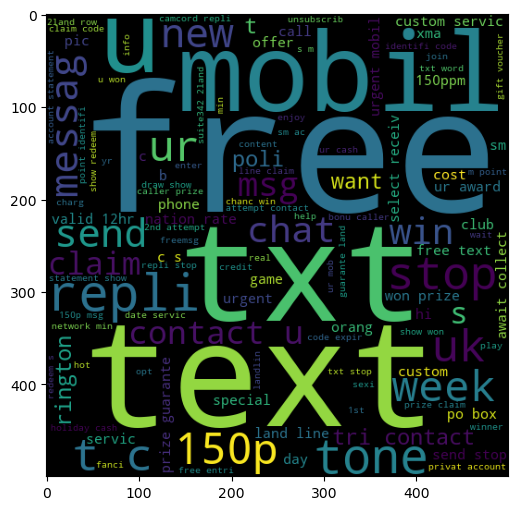

In [231]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [232]:
ham_wc = wc.generate(df[df['target']==0]['tranceform_text'].str.cat(sep=" "))

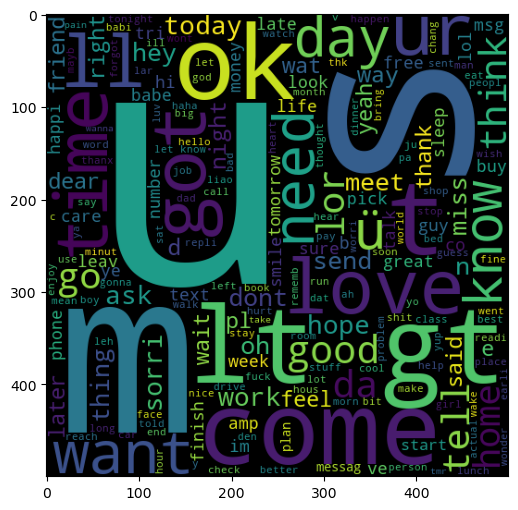

In [233]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [234]:
spam_corpus = []

for msg in df[df['target']==1]['tranceform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [235]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'appli',
 '08452810075over18',
 's',
 'freemsg',
 'hey',
 'darl',
 's',
 '3',
 'week',
 's',
 'word',
 'd',
 'like',
 'fun',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 '1',
 '50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'mobil',
 'updat',
 'free',
 '08002986030',
 'chanc',
 'win',
 'cash',
 '100',
 '20',
 '000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p',
 'day',
 '6day',
 '16',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 'won',
 '1',
 'week',
 'free',
 'membership',
 '100',
 '000',
 

In [243]:
from collections import Counter
spam_count = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [245]:
spam_count[0]


0        free
1           2
2           u
3         txt
4        text
5          ur
6       mobil
7           4
8        stop
9       repli
10      claim
11          1
12      prize
13        www
14          t
15          s
16        min
17       tone
18       cash
19     servic
20       150p
21        new
22         uk
23       send
24        won
25      nokia
26     urgent
27        msg
28    contact
29       week
Name: 0, dtype: object

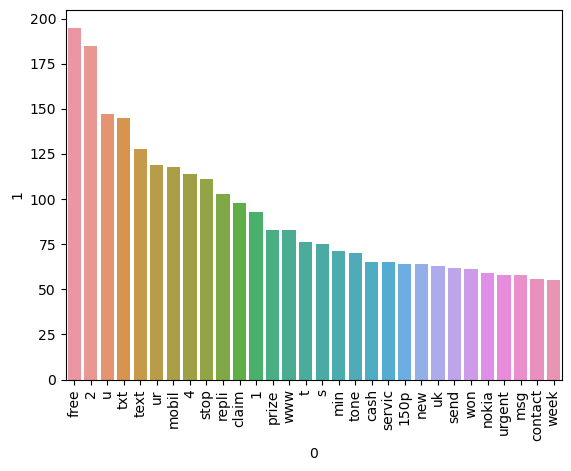

In [247]:
sns.barplot(x=spam_count[0],y=spam_count[1])
plt.xticks(rotation='vertical')
plt.show()

In [248]:
ham_corpus = []

for msg in df[df['target']==0]['tranceform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [249]:
len(ham_corpus)

34168

In [250]:
from collections import Counter
ham_count = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [251]:
ham_count.head()

,0,1
0,u,930
1,s,479
2,m,395
3,t,384
4,2,306


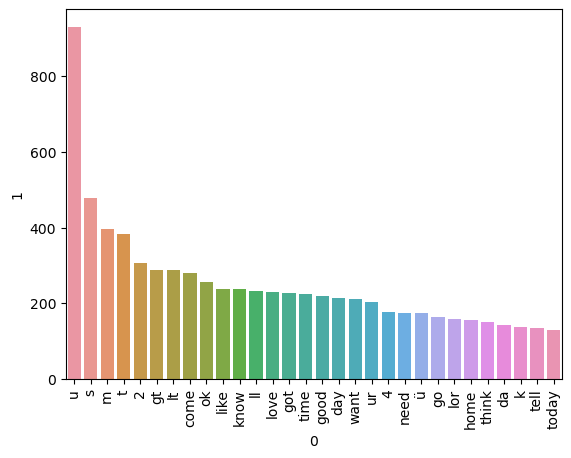

In [252]:
sns.barplot(x=ham_count[0],y=ham_count[1])
plt.xticks(rotation='vertical')
plt.show()